# Can we predict music's popularity using classification algorithms?

The aim of this project is to determine whether it is possible to predict with high precision how popular a song would be based purely on the song's demographics. Some of the criteria that will be used in evaluating this question are music loudness, acousticness, danceability, duration, etc. Multiple classification models will be used, scored, tuned and then compared to one another to determine what is the best model to determine a song's popularity going forward.



## 01 Introduction

I have a very personal relationship to music and am very interested in the music industry itself (i.e. what are some of the driving forces behind certain songs being popular) so I thought that it would be really interesting to see what are some of the key features that make certain song more popular than others. Since my perception of what popopular music is might actually turn out to be different from what the data suggests. 

## 02 Import Relevant Modules

In [19]:
# import relevant modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell #This package and the command below allow for the Jupyter notebook
#to print all the outputs and NOT just the final row
InteractiveShell.ast_node_interactivity = "all" #this command allows all outputs to be printed, not just the last command

## 03 Data Wrangling
This dataset comes directly from Kaggle and can be found by using the following link https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [14]:
# import the spotify dataset
df = pd.read_csv(r'C:\Users\MarceloFuentes\Documents\Springboard\Research Project - Spotify Data\spotify_archive\data.csv')

In [3]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


Based on quick observation this data is quite clean, however the one column that might need a bit of cleaning up is the "artists" field. However, since the purpose of this analysis will be to use numerical data, one-hot encoding every single artist would create an overfitted model, therefore we will bypass this step and work without cleaning this data set any further.  

## 04 Exploratory Data Analysis

In [4]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [5]:
# Perform a count of unique artists in the dataset
unique_artists = df['artists'].unique()
unique_artists = [x for x in unique_artists]
unique_artists = pd.DataFrame(unique_artists)
len(unique_artists)
len(df)
songs_per_artist = int(len(df)/len(unique_artists))
print('This list has '+str(len(df))+' songs and there is approximately '+str(songs_per_artist)+' songs per artist.')

This list has 170653 songs and there is approximately 5 songs per artist.


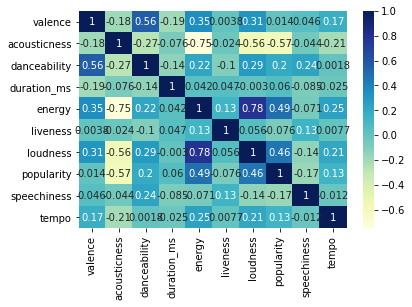

In [6]:
#Correlation matrix for variables, first make a smaller dataframe with numerical values only
df.columns
df_for_corr_matrix = df[['valence','acousticness','danceability',
       'duration_ms', 'energy','liveness', 'loudness','popularity',
       'speechiness', 'tempo']]
corr = df_for_corr_matrix.corr()
ax = sns.heatmap(corr,cmap="YlGnBu", annot=True)

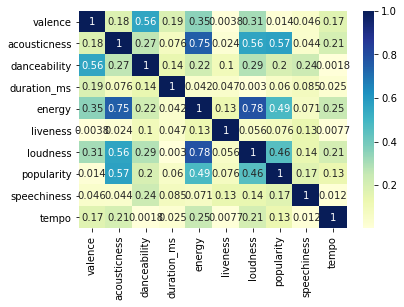

In [7]:
ax = sns.heatmap(abs(corr),cmap="YlGnBu", annot=True)

## Findings on correlation matrix
Based on this graph, some of the variables that appear to have the highest level of correlations are:

1) Energy and Acousticness = ~ -(0.75)

2) Energy and Loudness = ~ 0.78

3) Loudness and Acousticness = ~ (0.56)

4) Popularity and Acousticness = ~ (0.57)

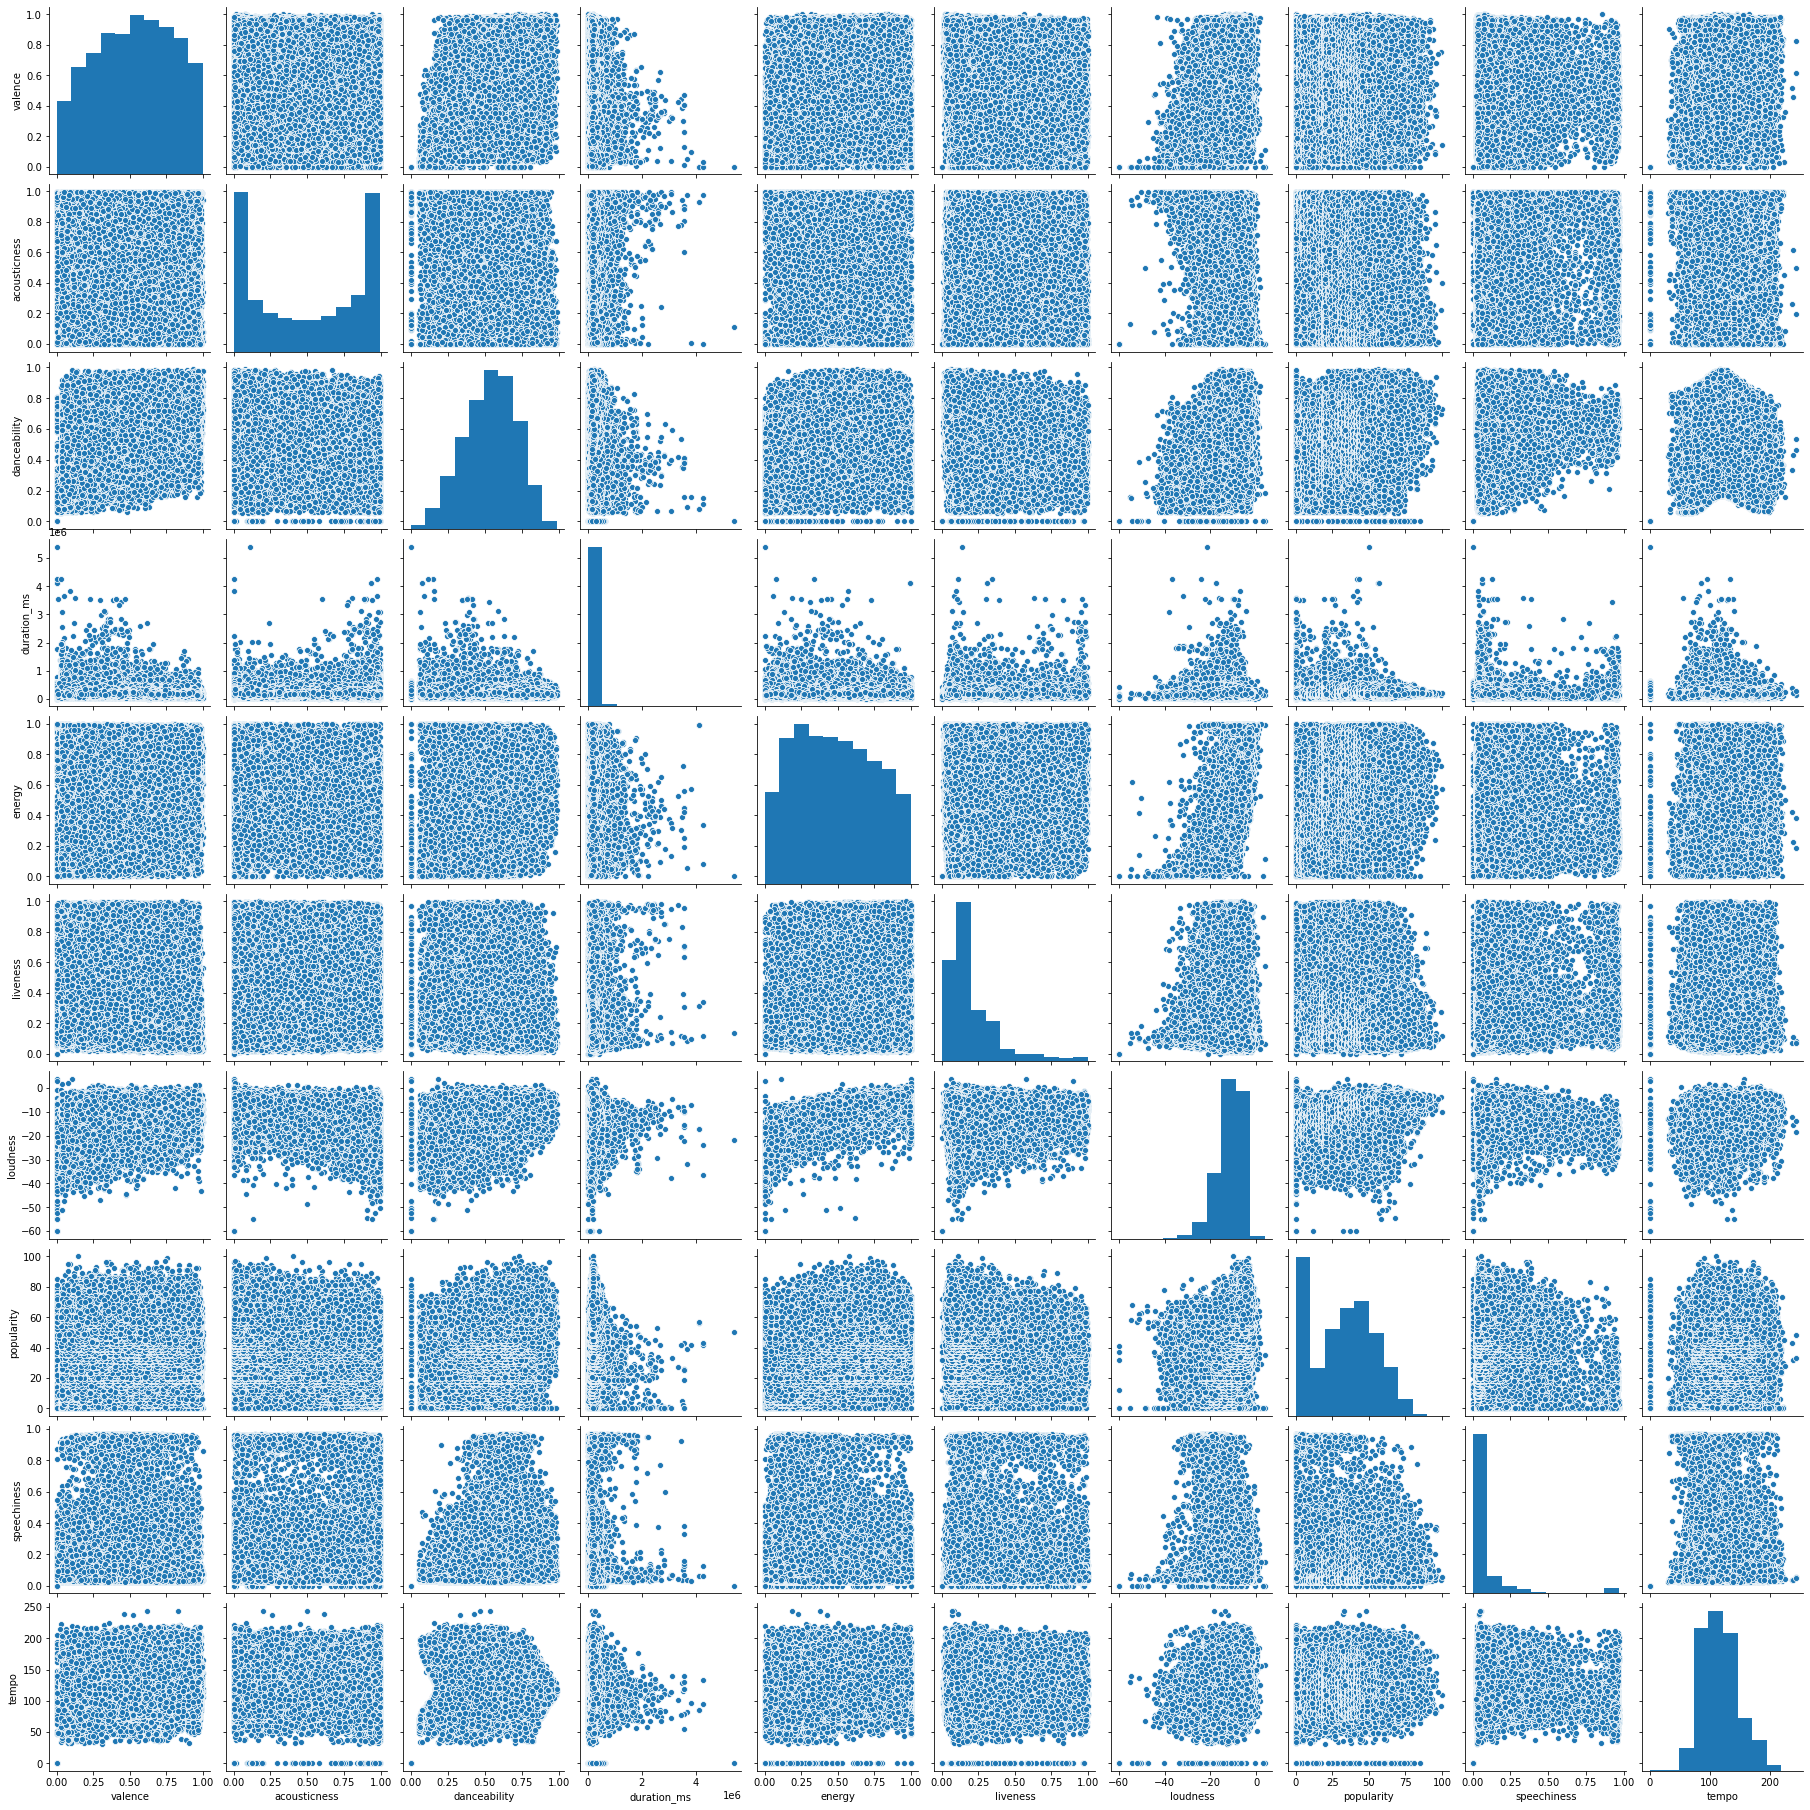

In [8]:
sns.pairplot(df_for_corr_matrix)

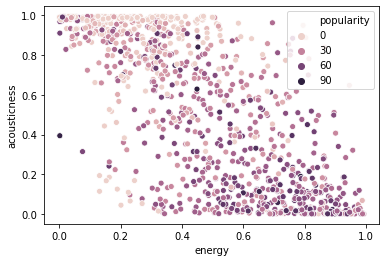

In [9]:
#Comparing Acousticness and Energy using a scatter plot, the negative relationship between variables is clear
df_scatter = pd.DataFrame()
df_scatter['acousticness'] = df['acousticness']
df_scatter['popularity'] = df['popularity']
df_scatter['energy'] = df['energy']
scatter_1 = sns.scatterplot(data=df_scatter.sample(1000), y='acousticness', x='energy', hue='popularity')

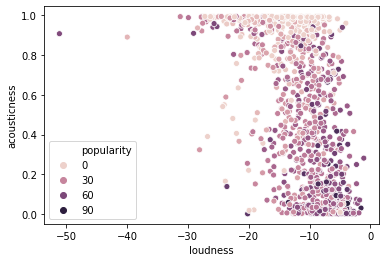

In [10]:
# Comparing Acousticness and Energy using a scatter plot, the negative relationship between variables is clear
df_scatter = pd.DataFrame()
df_scatter['acousticness'] = df['acousticness']
df_scatter['popularity'] = df['popularity']
df_scatter['loudness'] = df['loudness']
scatter_1 = sns.scatterplot(data=df_scatter.sample(1000), y='acousticness', x='loudness', hue='popularity')

# Insights so far
- Music popularity typically decreases the higher the music's acousticness and increases with lower acousticness
- Lower levels of loudness are also associated with more popular music and the louder the music the lower the popularity

Text(0.5, 0, '$popularity$')

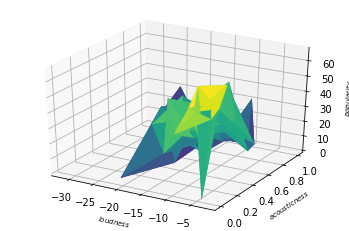

In [11]:
df_scatter = pd.DataFrame()
df_scatter['acousticness'] = df['acousticness']
df_scatter['popularity'] = df['popularity']
df_scatter['loudness'] = df['loudness']
df_scatter = df_scatter.sample(50) 
ax = plt.axes(projection='3d')
ax.plot_trisurf(df_scatter['loudness'], df_scatter['acousticness'], df_scatter['popularity'],
                cmap='viridis', edgecolor='none')
#(X, Y, Z)
ax.set_xlabel('$loudness$', fontsize=7)
ax.set_ylabel('$acousticness$', fontsize=7)
ax.set_zlabel('$popularity$', fontsize=7)

Text(0.5, 0, '$popularity$')

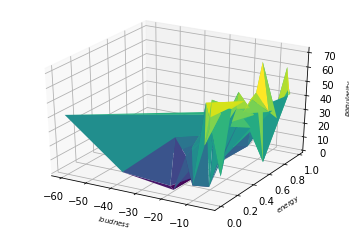

In [12]:
df_scatter = pd.DataFrame()
df_scatter['energy'] = df['energy']
df_scatter['popularity'] = df['popularity']
df_scatter['loudness'] = df['loudness']
df_scatter = df_scatter.sample(50) 
ax = plt.axes(projection='3d')
ax.plot_trisurf(df_scatter['loudness'], df_scatter['energy'], df_scatter['popularity'],
                cmap='viridis', edgecolor='none')
#(X, Y, Z)
ax.set_xlabel('$loudness$', fontsize=7)
ax.set_ylabel('$energy$', fontsize=7)
ax.set_zlabel('$popularity$', fontsize=7)

As a final step we will plot the average and median song popularity which we will use to determine popular vs. unpopular music later on if and when we decide to use regression models 

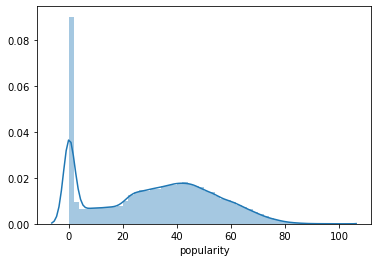

In [48]:
ax = sns.distplot(pd.to_numeric(df['popularity']))

In [49]:
from scipy import stats
median_pop = np.median(df['popularity'])
mean_pop = np.mean(df['popularity'])
print('The median popularity is '+str(int(median_pop)))
print('The mean popularity is '+str(int(mean_pop)))

The median popularity is 33
The mean popularity is 31


# Conclusions from EDA
Based on the graph above there is incontrovertible evidence that we would be able to use a combination of variables to forecast the popularity of difference songs using variables such as energy, loudness and acousticness which have very high correlations with one another and with the popularity variable itself.  